In [1]:
import fastf1 as ff1
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
ff1.Cache.enable_cache('../cache')

In [31]:
def get_loaded_session(year, round_number, id):
    session = ff1.get_session(year, round_number, id)
    session.load(laps = False, telemetry = False, weather = False, messages = False)
    session.results['Location'] = session.event['Location']
    return session.results

def get_sessions_by_year(year):
    quali_sessions = []
    race_sessions = []
    len_season = len(ff1.get_event_schedule(year))
    for i in range(len_season):
        try:
            quali_sessions.append(get_loaded_session(year, i + 1, 'Q'))
            race_sessions.append(get_loaded_session(year, i + 1, 'R'))
        except:
            print('Could not get results for round ' + str(i + 1) + ' of ' + str(year) + ' season')
            pass
    
    return quali_sessions, race_sessions

In [32]:
quali, race = get_sessions_by_year(2023)

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '55', '14', '63', '44', '18', '31', '27', '4', '77', '24', '22', '23', '2', '20', '81', '21', '10']
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.0.7]
req            INFO 	Using cached data for driver_info
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
core           INFO 	Finished loading data for 20 drivers: ['11', '16', '14', '63', '55', '18', '31', '44', '81', '10', '27', '24', '20', '77', '1', '22', '23', '21', '4', '2']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Ra

Could not get results for round 23 of 2023 season


# Test on first race

In [33]:
alpine_quali = [(q.query('DriverNumber == "31"'), q.query('DriverNumber == "10"')) for q in quali]

alpine_race = [(r.query('DriverNumber == "31"'), r.query('DriverNumber == "10"')) for r in race]


In [53]:
alpine_quali[0][1]['Q1'][0].total_seconds()

92.181

In [59]:
alpine_q = pd.DataFrame()
for (ocon, gasly) in alpine_quali:
    oco_time = np.NaN
    gas_time = np.NaN
    if not (pd.isnull(ocon['Q3']).any()) and not (pd.isnull(gasly['Q3']).any()):
        oco_time = ocon['Q3'][0].total_seconds()
        gas_time = gasly['Q3'][0].total_seconds()
    elif not (pd.isnull(ocon['Q2']).any()) and not (pd.isnull(gasly['Q2']).any()):
        oco_time = ocon['Q2'][0].total_seconds()
        gas_time = gasly['Q2'][0].total_seconds()
    elif not (pd.isnull(ocon['Q1']).any()) and not (pd.isnull(gasly['Q1']).any()):
        oco_time = ocon['Q1'][0].total_seconds()
        gas_time = gasly['Q1'][0].total_seconds()
    sample = {
        'OconResult' : ocon['Position'][0],
        'GaslyResult' : gasly['Position'][0],
        'OconTime' : oco_time,
        'GaslyTime' : gas_time
    }
    alpine_q[ocon['Location'][0]] = pd.Series(sample)

alpine_q = alpine_q.transpose()

In [70]:
alpine_q['OconResult']

Sakhir                9.0
Jeddah                7.0
Melbourne            11.0
Baku                 12.0
Miami                 8.0
Monaco                4.0
Barcelona             7.0
Montréal              6.0
Spielberg            12.0
Silverstone          13.0
Budapest             12.0
Spa-Francorchamps    15.0
Zandvoort            17.0
Monza                18.0
Marina Bay            8.0
Suzuka               14.0
Lusail                8.0
Austin                8.0
Mexico City          16.0
São Paulo            12.0
Las Vegas            17.0
Yas Island           12.0
Name: OconResult, dtype: float64

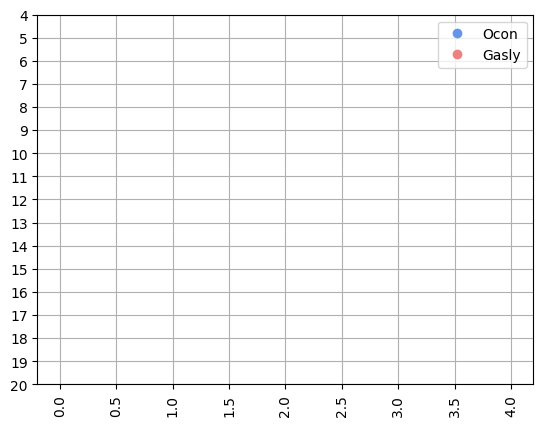

In [155]:
from matplotlib.collections import LineCollection

fig, ax = plt.subplots()

ax.vlines(alpine_q.index, alpine_q['OconResult'], alpine_q['GaslyResult'])

ax.plot(alpine_q['OconResult'], 'o', label='Ocon', color='cornflowerblue')
ax.plot(alpine_q['GaslyResult'], 'o', label='Gasly', color='lightcoral')

ax.grid()
ax.set_yticks(np.arange(0, 21, 1)[1:])
ax.set_ylim([4, 20])
ax.invert_yaxis()
plt.legend()
plt.xticks(rotation=90)
plt.show()

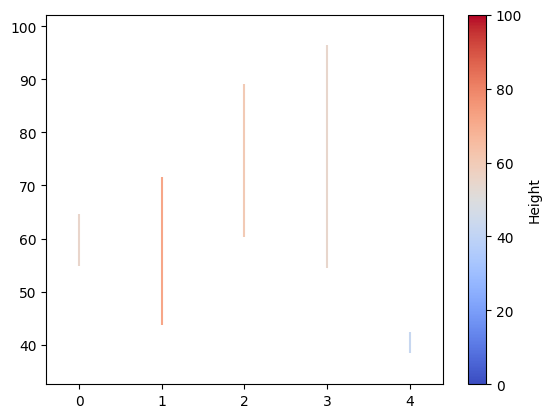

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Assuming alpine_q is your DataFrame with indices and two columns: 'OconResult' and 'GaslyResult'
# Example DataFrame
np.random.seed(0)  # For reproducible results
alpine_q = pd.DataFrame({
    'OconResult': np.random.rand(5) * 100,
    'GaslyResult': np.random.rand(5) * 100,
})

fig, ax = plt.subplots()

for index, row in alpine_q.iterrows():
    # Define the start and end points for the vertical lines
    x = [index, index]
    y = [row['OconResult'], row['GaslyResult']]
    
    # Generate the points along the line (including start and end)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    # Create a LineCollection
    lc = LineCollection(segments, cmap='coolwarm', norm=plt.Normalize(0, 100))
    
    # Set the LineCollection's array to the y-values (heights) of your points to control the color
    lc.set_array(np.array(y))
    
    # Add the LineCollection to the axes
    ax.add_collection(lc)

# Set the colorbar to represent the height values
cbar = plt.colorbar(lc)
cbar.set_label('Height')

# Setting the plot limits
ax.autoscale()
ax.margins(0.1)
plt.show()
